<a href="https://colab.research.google.com/github/heidaralavi/Gas-Prj/blob/main/Linear_Regression_using_PyTorch_for_gas_consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
url = 'https://raw.githubusercontent.com/heidaralavi/Gas-Prj/main/total.csv'
df=pd.read_csv(url)
df=df.set_index('Date')
df.head()

,Moisture_600,Blaine_After_HPGR,Tfe_Before_Mixer,FeO_Before_Mixer,Online_hours,Grate_Feed(ton),Grate_Speed(rpm),Depth(mm),EP1_Temp(deg),EP2_Temp(deg),Grate_Zoon3_Temp(deg),Grate_Zoon4_Temp(deg),Amb_Temp(deg),KL1_Speed(rpm),AN1_Speed(rpm),730FN1_Damper,730FN1_Amp,AN1_Zoon3_Temp(deg),Gas_Consumption(Nm3)
Date,,,,,,,,,,,,,,,,,,,
3/22/2019,9.068056,1944.333333,66.943333,21.596667,23.000000,12130.79,6.178099,129.977407,113.830519,96.924823,823.695961,947.918406,16.426996,1.720463,1.722029,33.128261,185.063912,141.628364,196364
3/23/2019,8.997183,2014.000000,66.873333,21.420000,23.533333,12383.61,6.197217,130.267644,111.230717,97.945284,791.477252,928.687125,16.367289,1.720708,1.634924,32.501389,183.892294,145.570481,209304
3/24/2019,8.795833,2036.909091,66.873333,21.246667,23.400000,12413.71,5.976046,133.678219,111.999794,99.243076,830.765571,939.656421,18.876778,1.720636,1.650556,31.961806,180.630365,173.127236,206200
3/25/2019,8.850536,2028.555556,66.986667,21.990000,23.583333,12277.02,5.978728,129.616905,114.068555,102.256167,825.551090,924.538606,21.236601,1.720821,1.590273,31.493056,177.220492,179.281210,203772
3/26/2019,9.006061,2034.181818,67.096667,21.846667,19.883333,9942.13,4.718885,138.999936,115.877855,100.122762,724.071424,910.241250,18.896511,1.708230,1.278280,26.135069,163.096300,129.430960,200120


نرمال سازی داده ها

In [6]:
col=df.columns
data=df.values
ind = df.index.values

In [8]:
data.shape

(837, 19)

In [9]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
normal_data = trans.fit_transform(data)
normal_df=pd.DataFrame(normal_data,columns=col,index=ind)
normal_df.describe()

,Moisture_600,Blaine_After_HPGR,Tfe_Before_Mixer,FeO_Before_Mixer,Online_hours,Grate_Feed(ton),Grate_Speed(rpm),Depth(mm),EP1_Temp(deg),EP2_Temp(deg),Grate_Zoon3_Temp(deg),Grate_Zoon4_Temp(deg),Amb_Temp(deg),KL1_Speed(rpm),AN1_Speed(rpm),730FN1_Damper,730FN1_Amp,AN1_Zoon3_Temp(deg),Gas_Consumption(Nm3)
count,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,0.477950,0.511380,0.585041,0.576710,0.945827,0.671993,0.659803,0.454869,0.241933,0.624765,0.758378,0.404087,0.526687,0.681928,0.626441,0.475348,0.768247,0.623761,0.410754
std,0.155161,0.179270,0.177414,0.184786,0.140101,0.157386,0.175665,0.173881,0.134492,0.158191,0.138106,0.146160,0.255519,0.173184,0.169147,0.207824,0.172493,0.198828,0.174579
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.374966,0.385587,0.460066,0.442487,0.978261,0.614517,0.562485,0.306938,0.151815,0.554199,0.685404,0.343648,0.301951,0.515915,0.558394,0.362370,0.711797,0.493290,0.283447
50%,0.474625,0.498991,0.593399,0.578238,1.000000,0.699525,0.662921,0.459551,0.209289,0.622071,0.773002,0.449293,0.513398,0.730826,0.627361,0.426318,0.789032,0.630918,0.415035
75%,0.587626,0.629318,0.709571,0.715544,1.000000,0.759497,0.781481,0.582144,0.307224,0.729180,0.865879,0.503554,0.758908,0.829753,0.702693,0.478857,0.870309,0.758262,0.527371
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
# split into train and test sets
from sklearn.model_selection import train_test_split
X, y = normal_data[:, :-1], normal_data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [12]:
import torch
from torch.autograd import Variable

In [41]:
X_train_tensor = torch.Tensor(X_train)
y_train_tensor = torch.Tensor(y_train)
y_train_tensor = torch.reshape(y_train_tensor, (-1,1))
print(X_train_tensor.size())
y_train_tensor.size()


torch.Size([585, 18])


torch.Size([585, 1])

In [42]:
class LinearRegressionModel(torch.nn.Module):
 
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(18, 1)  # 18 in and one out
 
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred


In [50]:
# model
model = LinearRegressionModel()

In [53]:
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr = 0.0001)

In [54]:
for epoch in range(500):
 
    # Forward pass: Compute predicted y by passing
    # x to the model
    pred_y = model(X_train_tensor)
 
    # Compute and print loss
    loss = criterion(pred_y, y_train_tensor)
 
    # Zero gradients, perform a backward pass,
    # and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 11.31387710571289
epoch 1, loss 11.206085205078125
epoch 2, loss 11.10034465789795
epoch 3, loss 10.996615409851074
epoch 4, loss 10.894851684570312
epoch 5, loss 10.795016288757324
epoch 6, loss 10.697066307067871
epoch 7, loss 10.600963592529297
epoch 8, loss 10.506669044494629
epoch 9, loss 10.414145469665527
epoch 10, loss 10.323356628417969
epoch 11, loss 10.23426342010498
epoch 12, loss 10.146834373474121
epoch 13, loss 10.061034202575684
epoch 14, loss 9.976826667785645
epoch 15, loss 9.894183158874512
epoch 16, loss 9.813066482543945
epoch 17, loss 9.73344612121582
epoch 18, loss 9.655293464660645
epoch 19, loss 9.578577041625977
epoch 20, loss 9.503266334533691
epoch 21, loss 9.429332733154297
epoch 22, loss 9.35675048828125
epoch 23, loss 9.285486221313477
epoch 24, loss 9.2155179977417
epoch 25, loss 9.146815299987793
epoch 26, loss 9.079354286193848
epoch 27, loss 9.01310920715332
epoch 28, loss 8.948055267333984
epoch 29, loss 8.884166717529297
epoch 30, loss

In [55]:
X_test_tensor = torch.Tensor(X_test)
pred_y = model(X_test_tensor)

In [63]:
from sklearn.metrics import r2_score
print("R2 Score: {:.2f}%".format(r2_score(pred_y.detach().numpy(), y_test)*100))

R2 Score: 71.97%


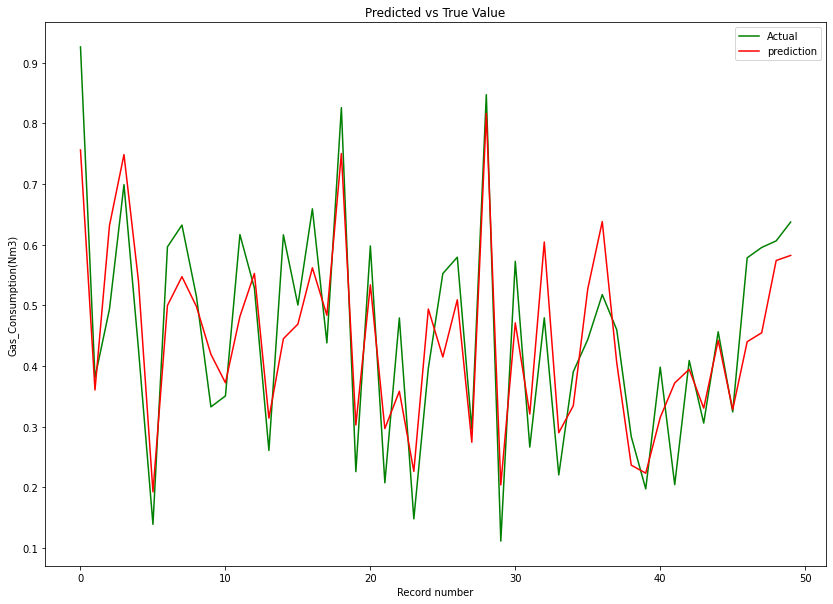

In [65]:
plt.figure(figsize=(14,10))
plt.plot(range(50),y_test[0:50], color = "green")
plt.plot(range(50),pred_y.detach().numpy()[0:50], color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(col[-1])
plt.show()